### Player Air Yards Distribution, by Team
Top Four Targeted Players per Team, Minimum 3 Targets | Through Week 2

Recreating This Visualization from @SamHoppen on Twitter
https://twitter.com/SamHoppen/status/1704149335267504182?t=AewsPrVT-5Yaw6HVHZoHBQ&s=19

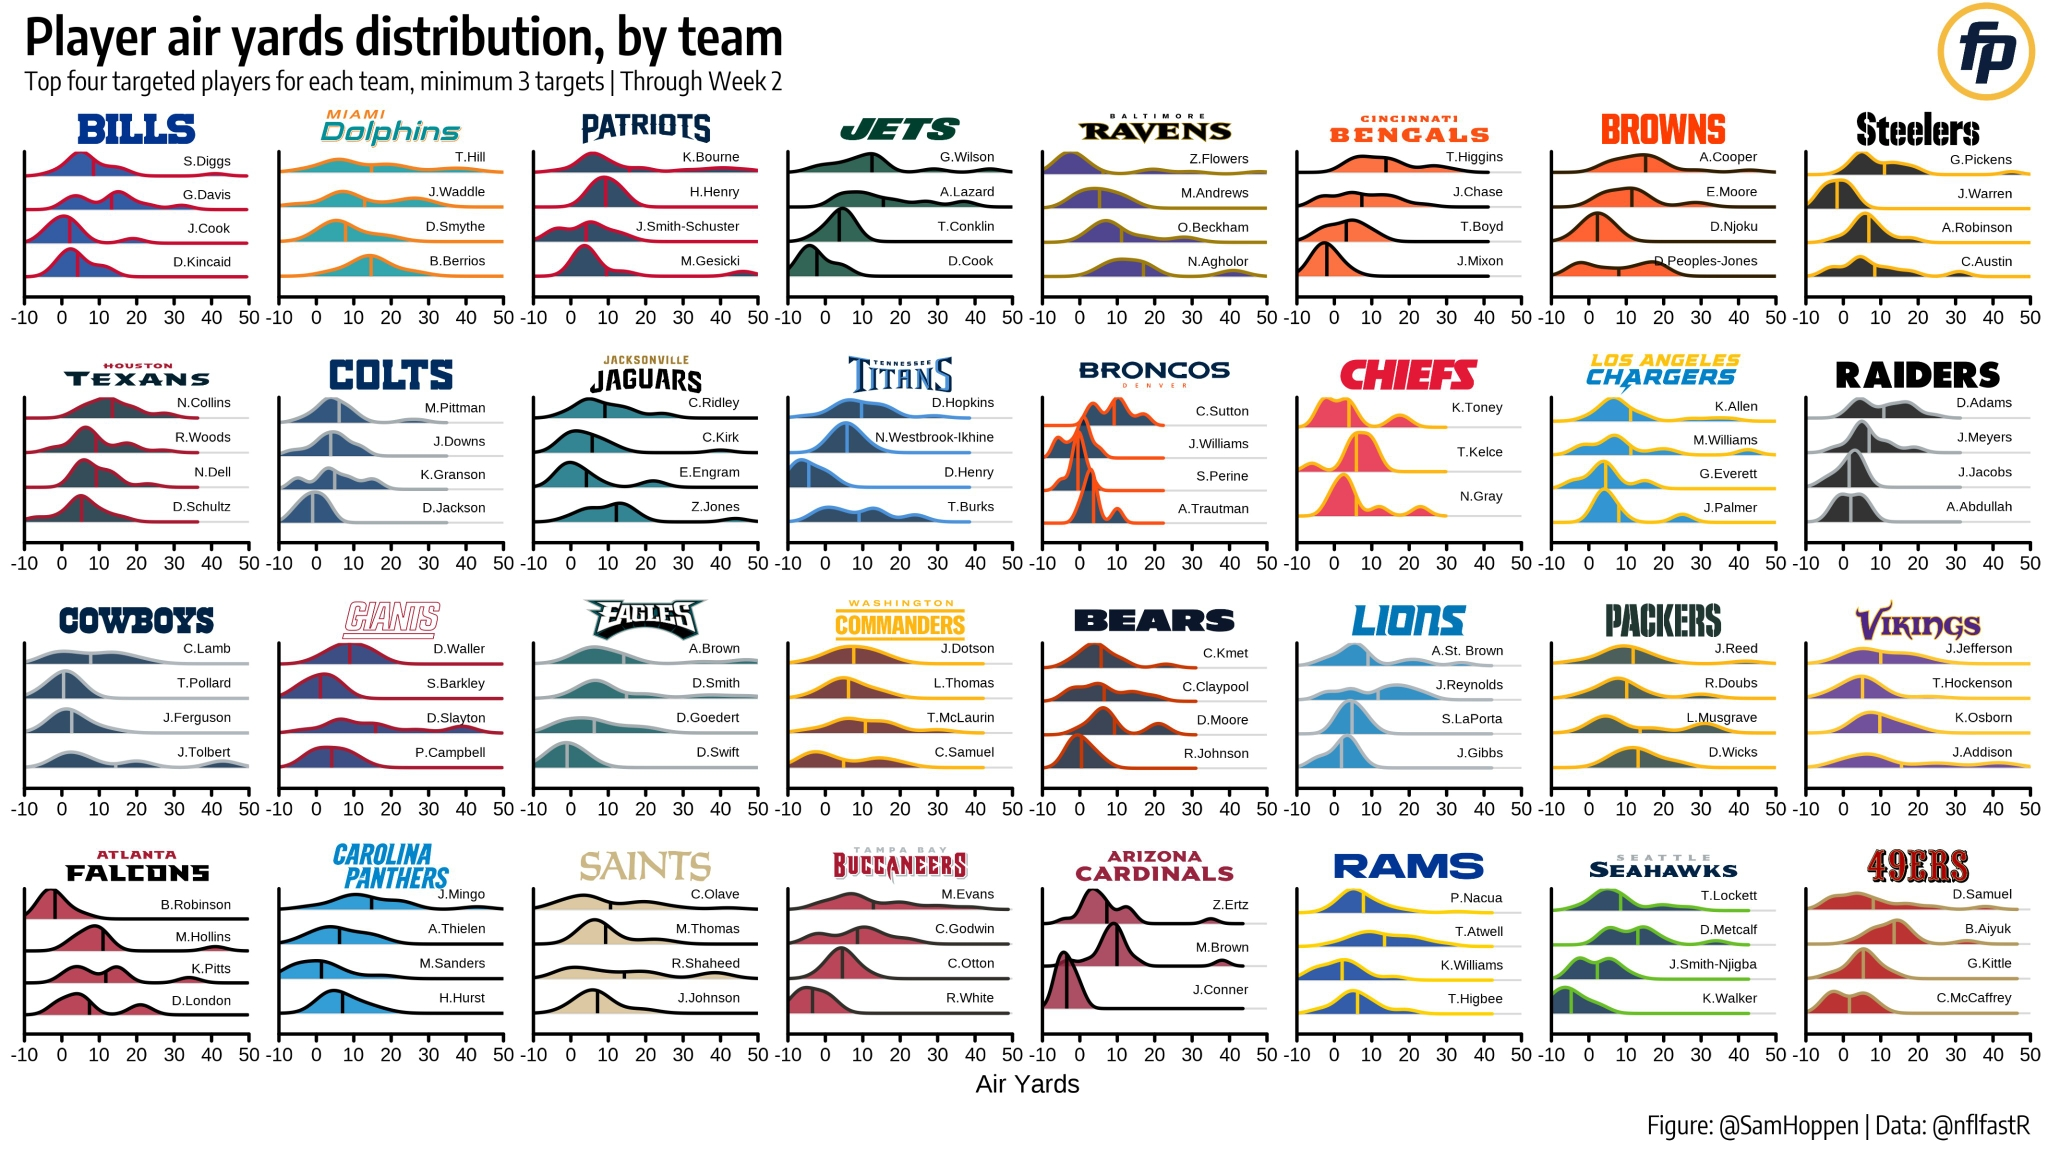

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
player_dir = 'C:/Users/.../nflfastR/Data/pbp/'
df = pd.read_csv(player_dir+'play_by_play_2023.csv')

C:\Users\jvasq\AppData\Local\Temp\ipykernel_34236\3248544022.py:2: DtypeWarning: Columns (179,180,182,183,218,219,220,253,254,255,260,262,263) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(player_dir+'play_by_play_2023.csv')


In [3]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
reception_cols = ['posteam','play_id','game_id','drive','qtr','down','yardline_100','pass_length','pass_location','air_yards',
                  'yards_after_catch','td_team','td_player_name','td_player_id','complete_pass','passer_player_id','passer_player_name',
                  'passing_yards','receiver_player_id','receiver_player_name','receiving_yards','receiver','receiver_id']
_player_rcpt = df.loc[(df['play_type'] == 'pass') & (df['sack'] == 0) & (~df['receiver'].isna()) & (df['two_point_attempt'] == 0), reception_cols]

In [5]:
agg = {'complete_pass':'sum','receiver_id':'count','receiving_yards':'sum','air_yards':'sum','yards_after_catch':'sum'}
player_stats = (_player_rcpt.loc[:, ['receiver_player_id','receiver','complete_pass','receiver_id','receiving_yards','air_yards','yards_after_catch']]
                           .groupby(['receiver_player_id','receiver'], as_index=False)
                           .agg(agg)
                           .rename(columns={'complete_pass':'receptions','receiver_id':'targets'})
                           .sort_values(by=['targets','receptions'],ascending=False))

player_stats['ry_per_reception'] = player_stats['receiving_yards'] / player_stats['receptions']
player_stats['ay_per_target'] = player_stats['air_yards'] / player_stats['targets']

player_stats.head(10)

,receiver_player_id,receiver,receptions,targets,receiving_yards,air_yards,yards_after_catch,ry_per_reception,ay_per_target
304,00-0039075,P.Nacua,25.0,35,266.0,272.0,111.0,10.640000,7.771429
163,00-0036322,J.Jefferson,20.0,25,309.0,250.0,103.0,15.450000,10.000000
39,00-0033040,T.Hill,16.0,24,255.0,354.0,62.0,15.937500,14.750000
154,00-0036252,M.Pittman,16.0,23,153.0,140.0,78.0,9.562500,6.086957
219,00-0037239,C.Olave,14.0,21,198.0,264.0,78.0,14.142857,12.571429
20,00-0031588,S.Diggs,17.0,20,168.0,169.0,60.0,9.882353,8.450000
181,00-0036554,N.Collins,13.0,20,226.0,270.0,75.0,17.384615,13.500000
49,00-0033307,K.Bourne,10.0,20,93.0,313.0,31.0,9.300000,15.650000
174,00-0036410,T.Higgins,8.0,20,89.0,276.0,32.0,11.125000,13.800000
5,00-0030279,K.Allen,14.0,19,187.0,212.0,47.0,13.357143,11.157895


In [6]:
player_rcpt = _player_rcpt.merge(player_stats.loc[:, ['receiver_player_id','receiver','receptions','targets','ry_per_reception','ay_per_target']], on=['receiver_player_id','receiver'], how='left')
player_rcpt = player_rcpt.loc[player_rcpt['targets'] >= 3]

In [7]:
# Team color RGB codes from https://teamcolorcodes.com/nfl-team-color-codes/
team_colors = pd.read_csv('C:/Users/.../TeamColors.csv')
team_colors = team_colors.rename(columns={'Abbreviation':'team'})
player_rcpt = player_rcpt.rename(columns={'posteam':'team'})
player_rcpt = player_rcpt.merge(team_colors.loc[:, ['team','Conference','Division','Color1','Color2','Color3','Color4']], on=['team'], how='left')

In [8]:
# Mapping the correct colors for each team based on Sam's plots

player_rcpt['color_1'] = ''
player_rcpt['color_2'] = ''

def color1(df):
    if df['team'] == 'PIT':
        color1 = df['Color2'].split(' ')[-1]
    elif df['team'] == 'JAX':
        color1 = df['Color4'].split(' ')[-1]
    elif df['team']== 'DEN':
        color1 = df['Color2'].split(' ')[-1]
    elif df['team'] == 'DAL':
        color1 = df['Color2'].split(' ')[-1]
    else:
        color1 = df['Color1'].split(' ')[-1]
    return color1

def color2(df):
    if df['team'] == 'BAL':
        color2 = df['Color3'].split(' ')[-1]
    elif df['team'] == 'PIT':
        color2 = df['Color1'].split(' ')[-1]
    elif df['team'] == 'JAX':
        color2 = df['Color1'].split(' ')[-1]
    elif df['team']== 'DEN':
        color2 = df['Color1'].split(' ')[-1]
    elif df['team'] == 'DAL':
        color2 = df['Color3'].split(' ')[-1]
    elif df['team'] == 'TB':
        color2 = df['Color3'].split(' ')[-1]
    else:
        color2 = df['Color2'].split(' ')[-1]
    return color2

player_rcpt['color_1'] = player_rcpt.apply(color1, axis=1)
player_rcpt['color_2'] = player_rcpt.apply(color2, axis=1)

In [9]:
player_rcpt.sample(10)

,team,play_id,game_id,drive,qtr,down,yardline_100,pass_length,pass_location,air_yards,yards_after_catch,td_team,td_player_name,td_player_id,complete_pass,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,receiver,receiver_id,receptions,targets,ry_per_reception,ay_per_target,Conference,Division,Color1,Color2,Color3,Color4,color_1,color_2
1726,DAL,230,2023_02_NYJ_DAL,1.0,1,2.0,22.0,short,middle,2.0,0.0,NaN,NaN,NaN,1.0,00-0033077,D.Prescott,2.0,00-0035261,T.Pollard,2.0,T.Pollard,00-0035261,9.0,11,5.444444,0.454545,NFC,East,Royal Blue #003594,Blue #041E42,Silver #869397,Silver-Green #7F9695,#041E42,#869397
1465,LV,2953,2023_02_LV_BUF,15.0,4,1.0,70.0,short,right,5.0,0.0,NaN,NaN,NaN,1.0,00-0031345,J.Garoppolo,5.0,00-0031381,D.Adams,5.0,D.Adams,00-0031381,12.0,17,12.500000,10.823529,AFC,West,Raiders Black #000000,Raiders Silver #A5ACAF,NaN,NaN,#000000,#A5ACAF
1388,TEN,2216,2023_02_LAC_TEN,11.0,3,2.0,24.0,deep,right,24.0,NaN,NaN,NaN,NaN,0.0,00-0029701,R.Tannehill,NaN,00-0037742,T.Burks,NaN,T.Burks,00-0037742,5.0,7,18.800000,15.571429,AFC,South,Titans Navy #0C2340,Titans Blue #4B92DB,Titans Red #C8102E,Titans Silver #8A8D8F,#0C2340,#4B92DB
1721,NYG,4145,2023_02_NYG_ARI,19.0,4,1.0,54.0,deep,right,18.0,0.0,NaN,NaN,NaN,1.0,00-0035710,D.Jones,18.0,00-0035535,D.Slayton,18.0,D.Slayton,00-0035535,6.0,11,12.833333,15.818182,NFC,East,Dark Blue #0B2265,Red #A71930,Gray #A5ACAF,NaN,#0B2265,#A71930
1072,TB,1852,2023_02_CHI_TB,9.0,2,3.0,43.0,deep,right,16.0,4.0,NaN,NaN,NaN,1.0,00-0034855,B.Mayfield,20.0,00-0039052,T.Palmer,20.0,T.Palmer,00-0039052,3.0,5,9.333333,10.200000,NFC,South,Red #D50A0A,Bay Orange #FF7900,Black #000000,Grey #B1BABF,#D50A0A,#000000
236,NYG,1813,2023_01_DAL_NYG,9.0,2,3.0,21.0,short,right,0.0,7.0,NaN,NaN,NaN,1.0,00-0035710,D.Jones,7.0,00-0034844,S.Barkley,7.0,S.Barkley,00-0034844,9.0,11,4.555556,1.090909,NFC,East,Dark Blue #0B2265,Red #A71930,Gray #A5ACAF,NaN,#0B2265,#A71930
1962,DEN,3073,2023_02_WAS_DEN,16.0,3,1.0,18.0,short,middle,2.0,2.0,NaN,NaN,NaN,1.0,00-0029263,R.Wilson,4.0,00-0034348,C.Sutton,4.0,C.Sutton,00-0034348,9.0,12,10.888889,9.166667,AFC,West,Broncos Orange #FB4F14,Broncos Navy #002244,NaN,NaN,#002244,#FB4F14
1249,HOU,2421,2023_02_IND_HOU,13.0,3,3.0,78.0,deep,middle,19.0,1.0,NaN,NaN,NaN,1.0,00-0039163,C.Stroud,20.0,00-0036554,N.Collins,20.0,N.Collins,00-0036554,13.0,20,17.384615,13.500000,AFC,South,Deep Steel Blue #03202F,Battle Red #A71930,NaN,NaN,#03202F,#A71930
139,CAR,2389,2023_01_CAR_ATL,14.0,3,3.0,60.0,short,middle,11.0,NaN,NaN,NaN,NaN,0.0,00-0039150,B.Young,NaN,00-0036955,T.Marshall,NaN,T.Marshall,00-0036955,2.0,6,11.500000,15.833333,NFC,South,Carolina Blue #0085CA,Black #101820,Silver #BFC0BF,NaN,#0085CA,#101820
787,SF,1027,2023_01_SF_PIT,6.0,1,2.0,44.0,short,middle,8.0,2.0,NaN,NaN,NaN,1.0,00-0037834,B.Purdy,10.0,00-0036261,B.Aiyuk,10.0,B.Aiyuk,00-0036261,11.0,14,15.636364,13.571429,NFC,West,49ers Red #AA0000,Gold #B3995D,NaN,NaN,#AA0000,#B3995D


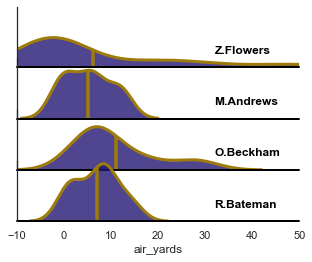

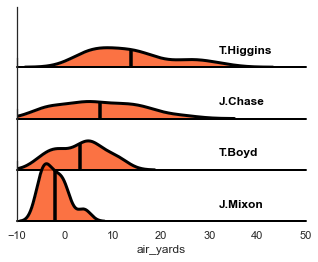

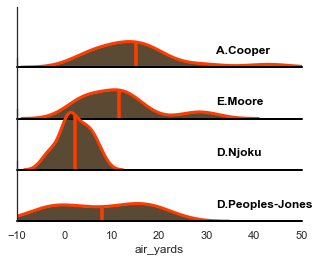

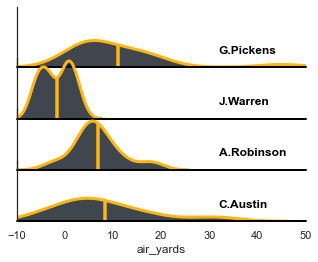

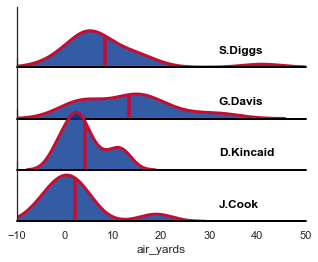

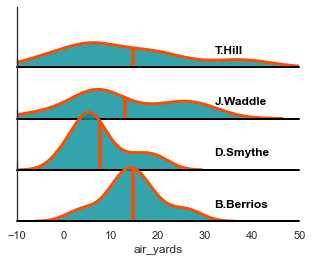

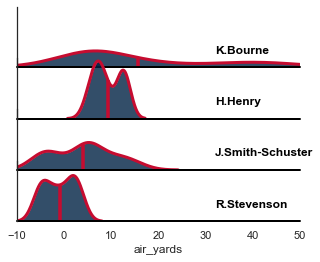

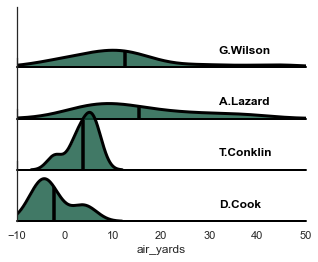

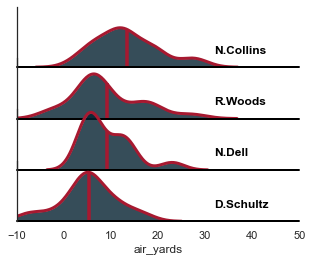

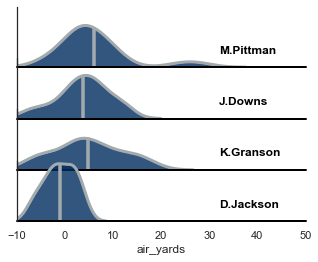

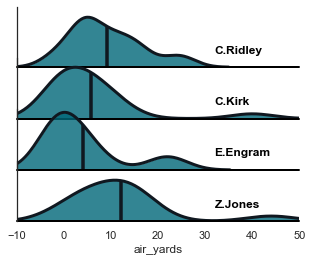

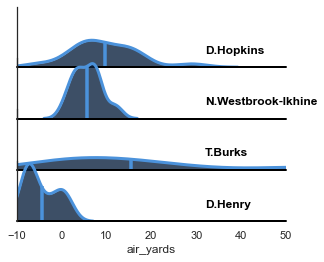

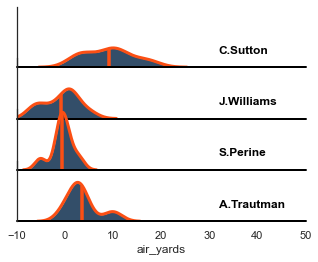

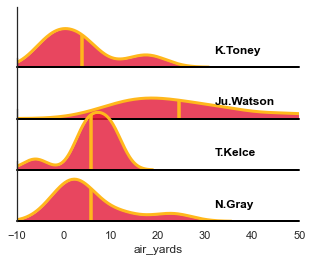

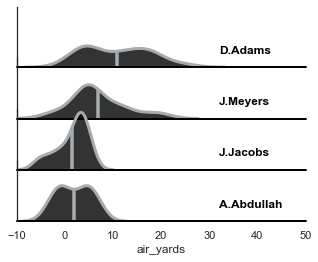

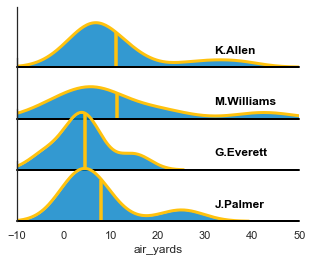

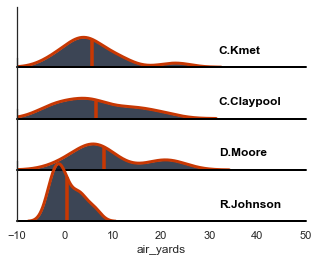

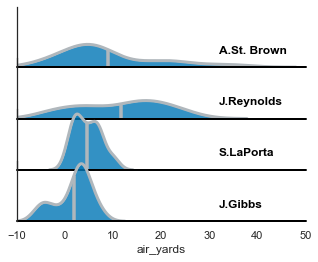

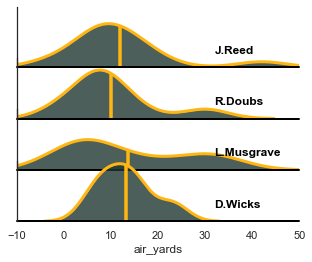

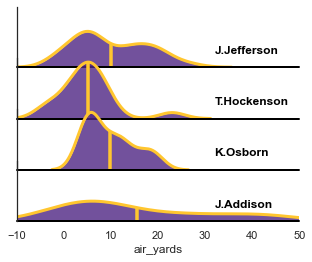

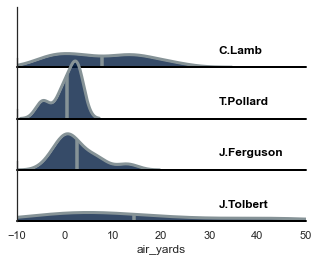

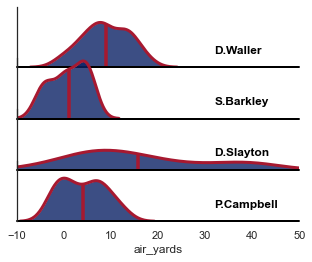

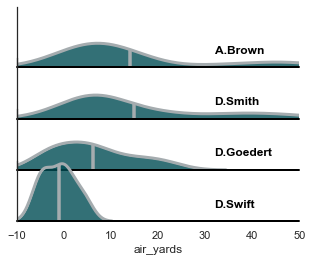

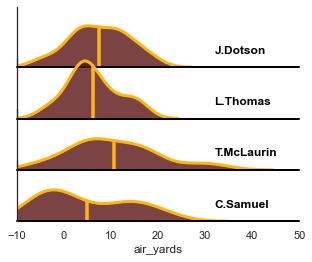

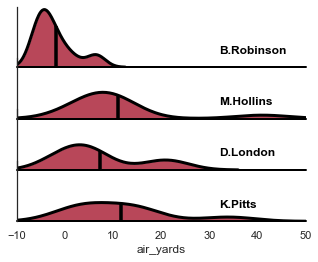

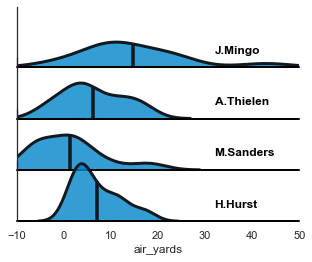

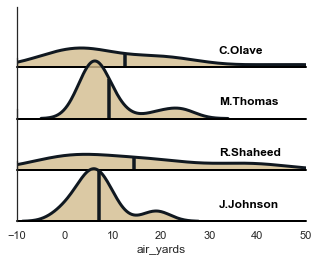

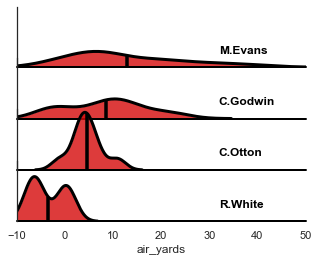

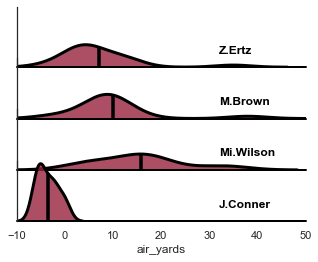

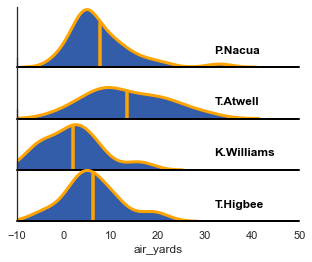

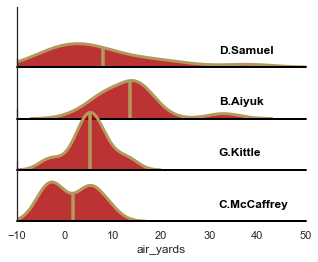

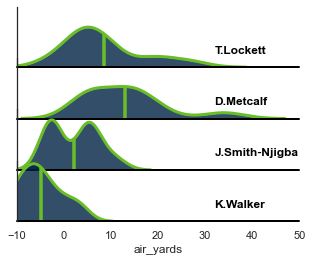

In [10]:
# https://seaborn.pydata.org/examples/kde_ridgeplot
# https://devpress.csdn.net/python/62fe1c6bc6770329308046f6.html

# Creates ridge plot per team
for team in team_colors['team']:
    _player_stats = (player_rcpt.loc[(player_rcpt['team'] == team) & (player_rcpt['targets'] >= 3)]
                                .sort_values(by=['targets','receptions','ay_per_target'],ascending=False)
                                .drop_duplicates(subset=['receiver','targets']))

# Returns receivers in order of average air yards  
    targets_order = []
    ay_order = []
    team_receivers = _player_stats['receiver'].values.tolist()
    team_ay_per_target = _player_stats['ay_per_target'].values.tolist()
    
    for receiver, ay in zip(team_receivers, team_ay_per_target):
        targets_order.append(receiver)
        ay_order.append(ay)
    
# Get first and second team colors, and make plot backgrounds transparent 
    color1 = player_rcpt.loc[player_rcpt['team'] == team, 'color_1'].unique()[0]
    color2 = player_rcpt.loc[player_rcpt['team'] == team, 'color_2'].unique()[0]
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
# Initialize the FacetGrid object
    _player_rcpt = player_rcpt.loc[player_rcpt['receiver'].isin(targets_order[:4])].sort_values(['targets','receptions','ay_per_target'], ascending=False)
    g = sns.FacetGrid(_player_rcpt, row='receiver', hue='receiver', aspect=5, height=1)

# Draw the densities in a few steps
    g.map(sns.kdeplot, "air_yards", bw_adjust=.8, clip_on=True, shade=False, linewidth=3, color=f'{color2}')

# Adding the average air yards per target for each receiver
    for ax, pos in zip(g.axes.flat, ay_order):
        kdeline = ax.lines[0]
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()
        height = np.interp(pos, xs, ys)
        ax.vlines(x=pos, ymin=0, ymax=height, color=f'{color2}', linestyle='-', linewidth=3.5)
        ax.fill_between(xs, 0, ys, facecolor=f'{color1}', alpha=.8)
        ax.tick_params(bottom=False)
        ax.set_xlim(-10, 50)

# Passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color='black', clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(.7, .2, label, fontweight="bold", color=color,
                ha="left", va="bottom", transform=ax.transAxes)

    g.map(label, "air_yards", color='black')

# Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.15)

# Remove axes details that don't play well with overlap
    g.set_titles('')
    g.set(xticks=range(-10,60,10), yticks=[], ylabel="")
    g.despine(bottom=True)
        
    plt.show()